In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.datasets import fetch_openml

**Task 1: Data Preparation**

In [2]:
# Load the dataset (MNIST in this example)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalize pixel values to the range [0, 1]
X = X / 255.0

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (56000, 784)
Testing data shape: (14000, 784)


**Interpretation:** Ensure the dataset preparation aligns with the input format required by the RBM. Normalization is crucial for effective training.

**Task 2: RBM Implementation**

In [3]:
# Define the RBM model
n_hidden_units = 128  # Number of hidden units
rbm = BernoulliRBM(n_components=n_hidden_units, learning_rate=0.06, n_iter=10, random_state=42)

# Fit the RBM model to the training data
rbm.fit(X_train)

BernoulliRBM(learning_rate=0.06, n_components=128, random_state=42)

**Interpretation:** The RBM setup should match the dataset's input size and have an appropriate number of hidden units for feature extraction.

**Task 3: Feature Extraction**

In [4]:
# Transform data into their hidden representations
X_train_rbm_features = rbm.transform(X_train)
X_test_rbm_features = rbm.transform(X_test)

# Save hidden representations
print(f"RBM-extracted feature shape: {X_train_rbm_features.shape}")

RBM-extracted feature shape: (56000, 128)


**Interpretation:** The feature vectors should represent meaningful latent representations of the original data.

**Task 4: Visualization of RBM Weights**

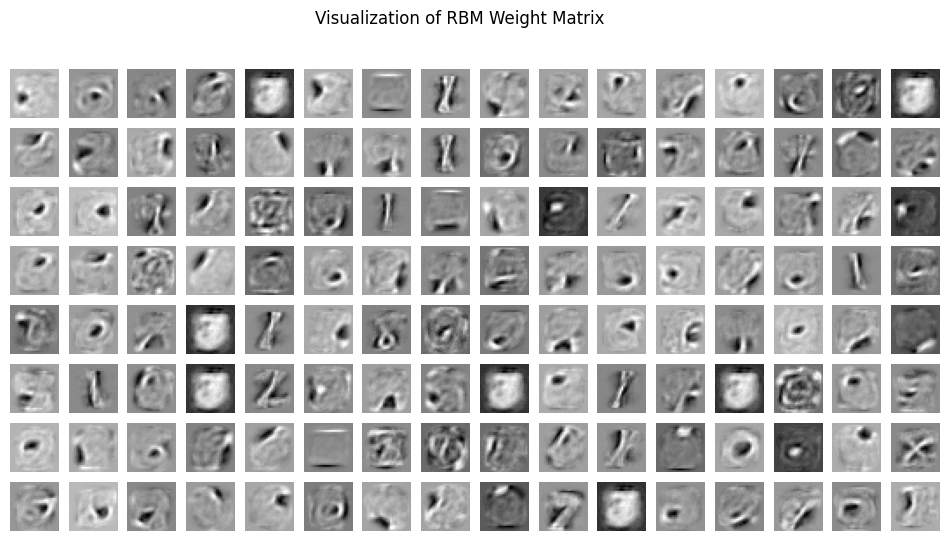

In [5]:
# Visualize the learned weights as images
fig, axes = plt.subplots(8, 16, figsize=(12, 6))
weights = rbm.components_

for i, ax in enumerate(axes.ravel()):
    if i < n_hidden_units:
        ax.imshow(weights[i].reshape(28, 28), cmap="gray")
        ax.axis('off')
plt.suptitle("Visualization of RBM Weight Matrix")
plt.show()

**Weight Matrix:** Visualization of weights as a grid (e.g., 16x16 or 32x32 for 256 hidden units).

* Each weight matrix image corresponds to a single hidden unit.
        
**Pattern Analysis:** Look for meaningful patterns in the weights, such as edge detectors or other features.

**Interpretation:** The weight visualizations should reveal how the RBM has learned features from the data.


**Task 5: Classification**

In [6]:
# Train a logistic regression classifier on RBM-extracted features
classifier = LogisticRegression(max_iter=500, random_state=42)
classifier.fit(X_train_rbm_features, y_train)

# Predict on test data
y_pred = classifier.predict(X_test_rbm_features)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy with RBM features: {accuracy:.4f}")
print(f"F1-Score with RBM features: {f1:.4f}")

Accuracy with RBM features: 0.9447
F1-Score with RBM features: 0.9448


**Classifier Accuracy/F1-Score:** Performance metrics from the classifier (e.g., Logistic Regression or SVM).

**Comparison with Raw Features:** Accuracy/F1-Score using raw pixel data vs. RBM features.
* Higher scores with RBM features indicate improved feature quality.

**Interpretation:** Classifier performance on RBM features should ideally surpass raw pixel data, highlighting the RBM’s efficacy.

**Task 6: Analysis**

In [7]:
# Baseline classifier on raw pixel data
pipeline = Pipeline(steps=[("logistic_regression", LogisticRegression(max_iter=500, random_state=42))])
pipeline.fit(X_train, y_train)
y_pred_baseline = pipeline.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_f1 = f1_score(y_test, y_pred_baseline, average='weighted')

print(f"Accuracy with raw pixel data: {baseline_accuracy:.4f}")
print(f"F1-Score with raw pixel data: {baseline_f1:.4f}")

# Performance comparison
print("\nClassification Report (RBM Features):")
print(classification_report(y_test, y_pred))

print("\nClassification Report (Raw Pixel Data):")
print(classification_report(y_test, y_pred_baseline))

# Conclusion
if accuracy > baseline_accuracy:
    print("RBM-extracted features improve classification performance.")
else:
    print("RBM-extracted features do not improve classification performance in this case.")

Accuracy with raw pixel data: 0.9204
F1-Score with raw pixel data: 0.9203

Classification Report (RBM Features):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1343
           1       0.98      0.98      0.98      1600
           2       0.94      0.95      0.95      1380
           3       0.93      0.91      0.92      1433
           4       0.94      0.94      0.94      1295
           5       0.93      0.92      0.93      1273
           6       0.97      0.97      0.97      1396
           7       0.97      0.93      0.95      1503
           8       0.91      0.92      0.91      1357
           9       0.91      0.93      0.92      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000


Classification Report (Raw Pixel Data):
              precision    recall  f1-score   support

           0       0.96      0.9

**Performance Comparison:** Tables or plots showing metrics (accuracy, F1-score, etc.) for both raw and RBM-transformed data.

**Discussion:** Text cells should explain how RBM features help reduce data dimensionality and capture relevant patterns.

**Interpretation:** If RBM-based features outperform raw features, it underscores the RBM’s ability to extract meaningful and compact data representations.
